<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

# 1. Importation des données.

In [1]:
''' !pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0
!jupyter lab build '''

import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# 2. Concaténer tous les dataframes d'Avril à Septembre.

In [2]:
months = ['apr','may', 'jun', 'jul', 'aug', 'sep']

# Shared file path
raw_fp = 'uber-raw-data-{}14.csv'

# Read and concatenate pickup data
dataset = pd.DataFrame()
for month in months:
    month_df = pd.read_csv(raw_fp.format(month))
    dataset = pd.concat([dataset, month_df])
    
dataset.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
dataset.shape

(4534327, 4)

In [4]:
dataset.describe(include='all')

,Date/Time,Lat,Lon,Base
count,4534327,4.534327e+06,4.534327e+06,4534327
unique,260093,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02617
freq,97,NaN,NaN,1458853
mean,NaN,4.073926e+01,-7.397302e+01,NaN
std,NaN,3.994991e-02,5.726670e-02,NaN
min,NaN,3.965690e+01,-7.492900e+01,NaN
25%,NaN,4.072110e+01,-7.399650e+01,NaN
50%,NaN,4.074220e+01,-7.398340e+01,NaN
75%,NaN,4.076100e+01,-7.396530e+01,NaN


# 3. Créer une copie de la data.

In [5]:
dataset_1 = dataset

# 4. Création des colonnes "Heure", "Jour", "Jour_Semaine" et "Mois" de la colonne "Date/Time".

In [6]:
useless_cols = ['Base']

print("Dropping useless columns...")
dataset_1 = dataset_1.drop(useless_cols, axis=1)                            # suprimer la colonne Basse 
dataset_1["Date/Time"] = pd.to_datetime(dataset_1["Date/Time"])             # transformer datetime 
dataset_1['Heure'] = dataset_1['Date/Time'].dt.hour                         # récuperation de l'heure
dataset_1['Jour'] = dataset_1['Date/Time'].dt.day                           # récuperation du jour
dataset_1['Jour_Semaine'] = dataset_1['Date/Time'].dt.dayofweek             # récuperation du jour de la semaine
dataset_1['Mois'] = dataset_1['Date/Time'].dt.month                         # récuperation du mois 

supri_col = ['Date/Time']
dataset_1 = dataset_1.drop(supri_col, axis=1)                               # puis suprimmé la colonne Date/Time une fois les info récupérer

print("Display of dataset: ")
display(dataset_1.head())
print()

Dropping useless columns...
Display of dataset: 


,Lat,Lon,Heure,Jour,Jour_Semaine,Mois
0,40.7690,-73.9549,0,1,1,4
1,40.7267,-74.0345,0,1,1,4
2,40.7316,-73.9873,0,1,1,4
3,40.7588,-73.9776,0,1,1,4
4,40.7594,-73.9722,0,1,1,4


# 5. Identification des variables voulues.

In [7]:
Test1 = ['Lat', 'Lon', 'Heure', 'Jour', 'Jour_Semaine', 'Mois']
dataset_Test1 = dataset_1[Test1]

## - Renommer les variables ("Mois" et "Jour_Semaine") par leurs vrais noms pour pouvoir faire mes visualisations.

In [8]:
Mois_map = {
    4: 'Avril',
    5: 'Mai',
    6: 'Juin', 
    7: 'Juillet',
    8: 'Aout',
    9: 'Septembre'
}

dataset_Test1['Mois'] = dataset_1['Mois'].replace(Mois_map)

# Map weekday
Jour_map = {
    0: 'Lundi',
    1: 'Mardi',
    2: 'Mercredi',
    3: 'Jeudi', 
    4: 'Vendredi', 
    5: 'Samedi',
    6: 'Dimanche'
}

dataset_Test1['Jour_Semaine'] = dataset_1['Jour_Semaine'].replace(Jour_map)


In [9]:
dataset_Test1

,Lat,Lon,Heure,Jour,Jour_Semaine,Mois
0,40.7690,-73.9549,0,1,Mardi,Avril
1,40.7267,-74.0345,0,1,Mardi,Avril
2,40.7316,-73.9873,0,1,Mardi,Avril
3,40.7588,-73.9776,0,1,Mardi,Avril
4,40.7594,-73.9722,0,1,Mardi,Avril
...,...,...,...,...,...,...
1028131,40.7668,-73.9845,22,30,Mardi,Septembre
1028132,40.6911,-74.1773,22,30,Mardi,Septembre
1028133,40.8519,-73.9319,22,30,Mardi,Septembre
1028134,40.7081,-74.0066,22,30,Mardi,Septembre


# 6. Identification du meilleur mois de ramassage pour sélectionner le dataset.

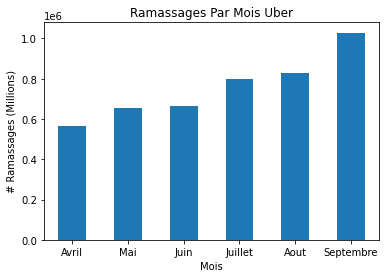

In [10]:
ramassages_mensuel = dataset_Test1['Mois'].value_counts(ascending=True)[Mois_map.values()]

ramassages_mensuel.plot(kind='bar', rot=0)
plt.title('Ramassages Par Mois Uber')
plt.xlabel('Mois')
plt.ylabel('# Ramassages (Millions)');

### On constate que les ramassages Uber sont plus importants pendant le mois de septembre.

## 6.1 Identification des meilleurs jours de ramassage.

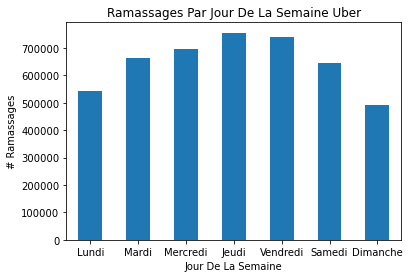

In [11]:
ramassages_Jour_Semaine = dataset_Test1['Jour_Semaine'].value_counts()[Jour_map.values()]

ramassages_Jour_Semaine.plot(kind='bar', rot=0)
plt.title('Ramassages Par Jour De La Semaine Uber')
plt.xlabel('Jour De La Semaine')
plt.ylabel('# Ramassages');

### Le graphique montre que les ramassages Uber sont plus importants les Jeudis et Vendredis.

## 6.2 Identification de la journée où il y a eu le plus de ramassage en septembre pour éventuelement travailler dessus.

In [12]:
ramassage_quotidien = dataset_Test1.groupby(['Jour', 'Mois'])['Heure'].count()
print('Journée la plus chargée: {}'.format(ramassage_quotidien.idxmax()))
print('Nombre de ramassages: {}'.format(ramassage_quotidien.max()))

Journée la plus chargée: (13, 'Septembre')
Nombre de ramassages: 43205


### Le jour où il y a eu le plus de ramassage au mois de septembre 2014 est le Samedi 13 Septembre avec plus de 40923 ramassages.

## 6.3 Identification des heures d'affluence où le ramassage est très important.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rush dans New York City')

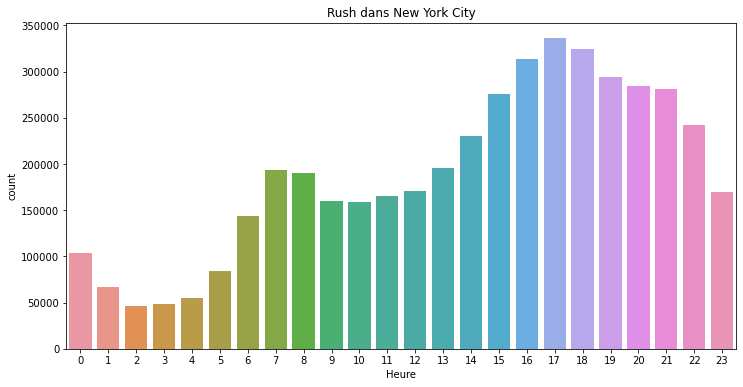

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(dataset_Test1['Heure'])
plt.title("Rush dans New York City")

## La figure ci-dessus montre que les ramassages Uber sont plus importants dans la ville de New York, le samedi 13 septembre, entre 14 et 22 heures.

## - Regroupement des données sur la base des jours de la semaine et des heures avec une carte thermique pour voir la densité.

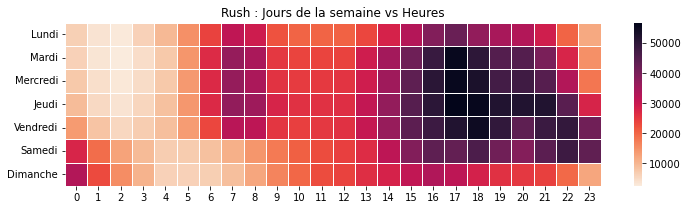

In [14]:

gouper_jour_heure = dataset_Test1.groupby(['Jour_Semaine','Heure'])['Heure'].count().unstack()
plt.figure(figsize=(12,3))
sns.heatmap(gouper_jour_heure.iloc[[2,3,4,1,6,5,0]],
            cmap='rocket_r',
            linewidths=0.5,
            linecolor='white')

# rotaion de l'axe y

plt.yticks(rotation=0)

# supprimer l'étiquette x et y

plt.xlabel(None)
plt.ylabel(None)
plt.title('Rush : Jours de la semaine vs Heures');

## La carte thermique montre que les ramassage Uber sont plus importants entre de 14h à 22 heures les jours de la semaine.

## En tirant les conclusions de l'analyse ci-dessus, nous pouvons affirmer que:
## - Le mois de septembre 2014 a connu le plus grand nombre de ramassage.
## - C'est entre 14 et 22 heures qu'il y a eu le plus de trajets. En d'autres termes, les ramassages étaient importants dans cette tranche horaire.
## - Les jeudis et les vendredis ont enregistré le plus grand nombre de ramassage par rapport aux autres jours.
## - Du lundi au vendredi, entre minuit et 4 heures, le nombre de ramassage était le plus faible.

# 7. Détermination et description des zones chaudes

## - Considérons le jour 'Samedi 13', du mois de 'Septembre', le plus fréquenté avec 43 000 ramassage pour travailler.

In [15]:
jour_freq = dataset_Test1[
    (dataset_Test1['Mois'] == 'Septembre') & (dataset_Test1['Jour'] == 13)]
jour_freq

,Lat,Lon,Heure,Jour,Jour_Semaine,Mois
15762,40.7228,-74.0045,0,13,Samedi,Septembre
15763,40.7618,-73.9940,0,13,Samedi,Septembre
15764,40.7505,-74.0031,0,13,Samedi,Septembre
15765,40.7418,-73.9972,0,13,Samedi,Septembre
15766,40.7092,-74.0132,0,13,Samedi,Septembre
...,...,...,...,...,...,...
912695,40.7521,-73.9853,23,13,Samedi,Septembre
912696,40.7622,-73.9899,23,13,Samedi,Septembre
912697,40.7159,-74.0085,23,13,Samedi,Septembre
912698,40.7810,-73.9762,23,13,Samedi,Septembre


## - Mettre de coté les catégoriels.

In [16]:
#On selectionne uniquement les colonnes pertinentes
Test1 = ['Lat', 'Lon', 'Heure']
jour_freq = jour_freq[Test1]

In [17]:
jour_freq

,Lat,Lon,Heure
15762,40.7228,-74.0045,0
15763,40.7618,-73.9940,0
15764,40.7505,-74.0031,0
15765,40.7418,-73.9972,0
15766,40.7092,-74.0132,0
...,...,...,...
912695,40.7521,-73.9853,23
912696,40.7622,-73.9899,23
912697,40.7159,-74.0085,23
912698,40.7810,-73.9762,23


# 7.1 Premier model avec la Méthode kmeans.

In [18]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

## - preprocessing du dataset.

In [19]:
X = jour_freq
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[-0.34764359, -0.55067873, -2.31846281],
       [ 0.59401888, -0.35745696, -2.31846281],
       [ 0.32117821, -0.52491583, -2.31846281],
       [ 0.11111505, -0.41634359, -2.31846281],
       [-0.67601819, -0.71077678, -2.31846281]])

In [20]:
kmeans = KMeans(n_clusters=7, random_state=0)  # fixer le nombre K aléatoirment 
kmeans.fit(X)

KMeans(n_clusters=7, random_state=0)

In [21]:
# Création une boucle qui collectera la somme des carrés internes (wcss) pour chaque valeur K 
# .inertia_ pour obtenir la valeur de la somme des carrés internes pour chaque valeur K.

wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("wcss for k={} --> {}".format(i, wcss[-1]))

wcss for k=1 --> 129614.9999999999
wcss for k=2 --> 98890.838855773
wcss for k=3 --> 78846.19950187544
wcss for k=4 --> 63096.9728019275
wcss for k=5 --> 54822.94025294109
wcss for k=6 --> 49120.39359117541
wcss for k=7 --> 43257.38183783718
wcss for k=8 --> 38620.531195181546
wcss for k=9 --> 35055.51235904034
wcss for k=10 --> 32120.422435805835


In [22]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

## - Création d'un plot pour visualiser l'inertie par cluster pour prendre une décision sur le nombre de clusters optimal.

In [23]:
# Création du DataFrame

wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Création de la figure 

fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Création du titre et des étiquettes de mes axes 

fig.update_layout(
    yaxis_title="Inertie",
    xaxis_title="# Clusters",
    title="Inertie par cluster"
)

# voir le rendu

fig.show(renderer="iframe") # sinon utilise workspace

## Le nombre de clusters optimal se situerait entre 5 ET 7 clusters qui ont une inertie plus faible.

In [24]:
from sklearn.metrics import  silhouette_score

In [25]:
# Compter mean silhouette score

s_score = []
k2 = []

## Attention, on doit commencer à i=2 car la silhouette ne peut accepter moins de 2 cluster (logique).

for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++")
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X)))
    k2.append(i)
    print("Silhouette score for K2={} is {}".format(i, s_score[-1]))

Silhouette score for K2=2 is 0.3661828632109072
Silhouette score for K2=3 is 0.38393398966290837
Silhouette score for K2=4 is 0.31242919986941053
Silhouette score for K2=5 is 0.3297803380936473
Silhouette score for K2=6 is 0.31256233893220564
Silhouette score for K2=7 is 0.3196237879042215
Silhouette score for K2=8 is 0.3082134001459005
Silhouette score for K2=9 is 0.3121670072222899
Silhouette score for K2=10 is 0.31111445355096934


## - Affichage des scores en fonction du nombre de clusters pour trancher sur le nombre de clusters optimal.

In [26]:
# Création du DataFrame 

cluster_scores=pd.DataFrame(s_score)
k_frame = pd.Series(k2)

# Création de la figure
fig = px.bar(data_frame=cluster_scores,  
             x=k2, 
             y=cluster_scores.iloc[:, -1]
            )

# Création du titre et des étiquettes de mes axes 

fig.update_layout(
    yaxis_title="Score avec Silhouette",
    xaxis_title="# Clusters",
    title="Score avec Silhouette par cluster"
)

# voir le rendu

fig.show(renderer="iframe") # sinon utilise workspace

## Donc 5 ou 6 clusters sera le nombre optimal à choisir selon les 2 graphiques.

## - On ré-entraîne un KMeans avec le nombre optimal de clusters.

In [27]:
kmeans = KMeans(n_clusters= 5)
kmeans.fit(X)

KMeans(n_clusters=5)

## - Création d'une nouvelle colonne 'Cluster_KMeans' sur les prédictions de notre jeu de données.

In [28]:
jour_freq.loc[:,'Cluster_KMeans'] = kmeans.predict(X)
jour_freq.head()

/tmp/ipykernel_125/1606484659.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lat,Lon,Heure,Cluster_KMeans
15762,40.7228,-74.0045,0,0
15763,40.7618,-73.9940,0,0
15764,40.7505,-74.0031,0,0
15765,40.7418,-73.9972,0,0
15766,40.7092,-74.0132,0,0


## - Visualisation de nos clusters sur une map.

In [29]:
jour_freq = jour_freq.sort_values("Heure", ascending=True)

fig = px.scatter_mapbox(jour_freq, lat="Lat", lon="Lon", mapbox_style="carto-positron", animation_frame = "Heure", zoom=9, color='Cluster_KMeans')
fig.show("iframe_connected")

## Conclusions :
### - Le model K-Means a permis d'identifier 5 clusters en mettant en évidence les différentes zones chaudes.
### - Manhattan est la zone la plus chaude qui est divisée en 2 zones différentes : nord et sud. 
### - Brookklyn et Queens correspondent à d'autres clusters et les points sont moins concentrés.
### - Les ramassages sont moins fréquents entre 1 h et 5h dans toutes les zones.

# 7.2 Méthode DBSCAN avec la colonne "Date". 

## - Nous allons prendre le dataset de Septembre sur un échantillon de 20000 lignes.

In [43]:
dataset_DB = dataset_1[dataset_1['Mois'] == 9]
dataset_DB = dataset_DB.sample(20000) # nous prenons un échantillons de 20000 ce qui va jouer forcement sur la dansité et le nombre de cleusteur
dataset_DB

,Lat,Lon,Heure,Jour,Jour_Semaine,Mois
254348,40.7314,-74.0012,22,27,5,9
551436,40.7218,-74.0099,8,22,0,9
468286,40.7579,-73.9732,19,15,0,9
379403,40.7237,-74.0103,6,9,1,9
389534,40.7569,-73.9744,20,9,1,9
...,...,...,...,...,...,...
396262,40.6802,-73.9465,13,10,2,9
607131,40.7470,-73.9529,23,26,4,9
680322,40.7582,-73.9687,15,5,4,9
744876,40.7704,-73.9582,15,14,6,9


## - Preprocessing du dataset.

In [44]:
X_1 = dataset_DB
sc = StandardScaler()
X_1 = sc.fit_transform(X_1)
X_1[:5]

array([[-0.18539494, -0.52268009,  1.33453909,  1.36700032,  1.05025833,
         0.        ],
       [-0.41596206, -0.6737315 , -1.01887854,  0.77233951, -1.5158537 ,
         0.        ],
       [ 0.45106638, -0.0365376 ,  0.83023531, -0.06018562, -1.5158537 ,
         0.        ],
       [-0.37032898, -0.68067639, -1.35508106, -0.77377859, -1.00263129,
         0.        ],
       [ 0.42704897, -0.05737228,  0.99833657, -0.77377859, -1.00263129,
         0.        ]])

In [45]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.2 , min_samples=5, metric="euclidean", algorithm="brute") 
# 0.005, min_samples=5, metric="euclidean", algorithm="brute"
# eps=0.2, min_samples=100, metric="manhattan"
# eps=1.2, min_samples=60, metric="manhattan", algorithm="brute"

db.fit(X_1)

DBSCAN(algorithm='brute', eps=1.2)

## - Détermination du nombre des clusters.

In [46]:
fig = go.Figure()

# Boucle permettant d'ajouter les points au graphique 

for i in np.unique(db.labels_):
    label = X_1[db.labels_== i] 
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show('iframe_connected')

## Nous relevons 5 clusters et des outliers.

In [47]:
np.unique(db.labels_) # on peu le verifier

array([-1,  0,  1,  2,  3,  4])

## - On ajoute la colonne "cluster_DBSCAN" à notre datast.

In [48]:
dataset_DB["cluster_DBSCAN"] = db.labels_
dataset_DB.head()

,Lat,Lon,Heure,Jour,Jour_Semaine,Mois,cluster_DBSCAN
254348,40.7314,-74.0012,22,27,5,9,0
551436,40.7218,-74.0099,8,22,0,9,0
468286,40.7579,-73.9732,19,15,0,9,0
379403,40.7237,-74.0103,6,9,1,9,0
389534,40.7569,-73.9744,20,9,1,9,0


## - Visualisation de l'évolution des clusters en 24 heure sur une map.

In [36]:
dataset_DB = dataset_DB.sort_values("Heure", ascending=True)

fig = px.scatter_mapbox(dataset_DB, lat="Lat", lon="Lon", mapbox_style="carto-positron", animation_frame = "Heure", zoom=9, color='cluster_DBSCAN')
fig.show("iframe_connected")

## La carte ci-dessus montre que dans les zones chaudes les clusters sont plus dense entre 14 et 21 Heures.

## - Visualisation de l'évolution des clusters par jours de la semaine.

In [49]:
dataset_DB = dataset_DB[dataset_DB['Jour'] < 8]

In [50]:
dataset_DB

,Lat,Lon,Heure,Jour,Jour_Semaine,Mois,cluster_DBSCAN
315139,40.7516,-74.0035,16,4,3,9,0
326114,40.7305,-73.9866,9,5,4,9,0
865749,40.6671,-73.9814,9,5,4,9,0
88865,40.7056,-74.0095,18,7,6,9,0
676725,40.7194,-74.0055,5,5,4,9,0
...,...,...,...,...,...,...,...
360920,40.7169,-74.0079,15,7,6,9,0
82819,40.7433,-74.0032,23,6,5,9,0
660034,40.7478,-73.9848,17,2,1,9,0
45201,40.7693,-73.9693,20,2,1,9,0


In [51]:
dataset_DB = dataset_DB.sort_values("Jour_Semaine", ascending=True)

In [52]:
Jour_map2 = {
    0: 'Lundi',
    1: 'Mardi',
    2: 'Mercredi',
    3: 'Jeudi', 
    4: 'Vendredi', 
    5: 'Samedi',
    6: 'Dimanche'
}

In [53]:
dataset_DB['Jour_Semaine'] = dataset_DB['Jour_Semaine'].replace(Jour_map2)

fig1 = px.scatter_mapbox(dataset_DB, lat="Lat", lon="Lon", mapbox_style="carto-positron", animation_frame = "Jour_Semaine", zoom=9, color='cluster_DBSCAN')
fig1.show("iframe_connected")

## La carte ci-dessus montre que la densité des clusters est plus élevée jeudi, vendredi et samedi de la semaine.

## Conclusion 
### DBSCAN considère Manhattan et Brooklyn comme les zones les plus chaudes avec un seul cluster de forte densité entre 14 et 21 Heures. Au niveau de Manhattan se trouvent de nombreux sites populaires comme Times Square, Broadway, Central Park, etc. En bas à droite du tracé, nous observons une petite zone de forte densité où se trouve l'aéroport JFK. Le fait que les ramassages soient concentrés dans ces zones n'est pas surprenant vu l'activité au niveau de ces endroits. Jeudi, vedredi et samedi sont les jours où il y a le plus de ramassage Uber.

# Conclusion générale

## Le model DBSCAN permet d'identifier la zone de densité la plus élevée à New York alors que le model K-mean nous permet de dégager plusieurs zones de forte densité. Cette différence nous permet de déduire que le model DBSCAN est plus pratique pour ce type de données car il nous permet de contôler les hyperparamètres afin d'identifier avec plus de précision les zones où il y a le plus de demandes uber par jour et par heure.